In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import torch


In [10]:
df=pd.read_csv('netflix.csv')
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,23-05-2002,1.242857,1.145714,1.156429,1.196429,104790000,1.196429
1,24-05-2002,1.225000,1.197143,1.214286,1.210000,11104800,1.210000
2,28-05-2002,1.232143,1.157143,1.213571,1.157143,6609400,1.157143
3,29-05-2002,1.164286,1.085714,1.164286,1.103571,6757800,1.103571
4,30-05-2002,1.107857,1.071429,1.107857,1.071429,10154200,1.071429
...,...,...,...,...,...,...,...
4876,05-10-2021,640.390015,606.890015,606.940002,634.809998,9534300,634.809998
4877,06-10-2021,639.869995,626.359985,628.179993,639.099976,4580400,639.099976
4878,07-10-2021,646.840027,630.450012,642.229981,631.849976,3556900,631.849976
4879,08-10-2021,643.799988,630.859985,634.169983,632.659973,3271100,632.659973


In [4]:
data=df.head(10)
data

,Date,High,Low,Open,Close,Volume,Adj Close
0,23-05-2002,1.242857,1.145714,1.156429,1.196429,104790000,1.196429
1,24-05-2002,1.225000,1.197143,1.214286,1.210000,11104800,1.210000
2,28-05-2002,1.232143,1.157143,1.213571,1.157143,6609400,1.157143
3,29-05-2002,1.164286,1.085714,1.164286,1.103571,6757800,1.103571
4,30-05-2002,1.107857,1.071429,1.107857,1.071429,10154200,1.071429
5,31-05-2002,1.078571,1.071429,1.078571,1.076429,8464400,1.076429
6,03-06-2002,1.149286,1.076429,1.080000,1.128571,3151400,1.128571
7,04-06-2002,1.140000,1.110714,1.135714,1.117857,3105200,1.117857
8,05-06-2002,1.159286,1.107143,1.110714,1.147143,1531600,1.147143
9,06-06-2002,1.232143,1.148571,1.150000,1.182143,2305800,1.182143


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4881 entries, 0 to 4880
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4881 non-null   object 
 1   High       4881 non-null   float64
 2   Low        4881 non-null   float64
 3   Open       4881 non-null   float64
 4   Close      4881 non-null   float64
 5   Volume     4881 non-null   int64  
 6   Adj Close  4881 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 267.1+ KB


In [6]:
df.sum()

Date         23-05-200224-05-200228-05-200229-05-200230-05-...
High                                             522283.407411
Low                                              506367.989464
Open                                             514401.157817
Close                                             514624.07952
Volume                                             81998324100
Adj Close                                         514624.07952
dtype: object

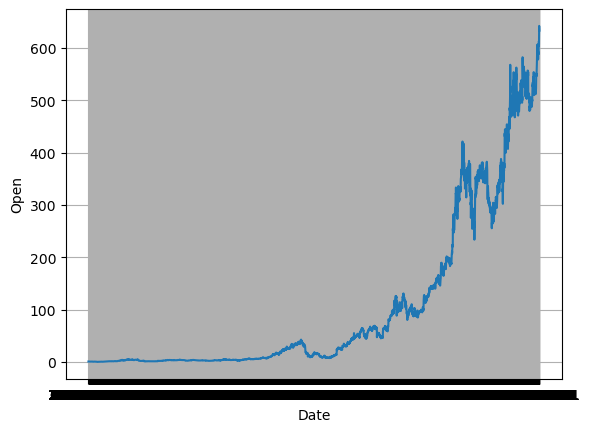

In [7]:
sns.lineplot(x="Date",y="Open",data=df)
plt.grid()

<Axes: xlabel='Adj Close', ylabel='Volume'>

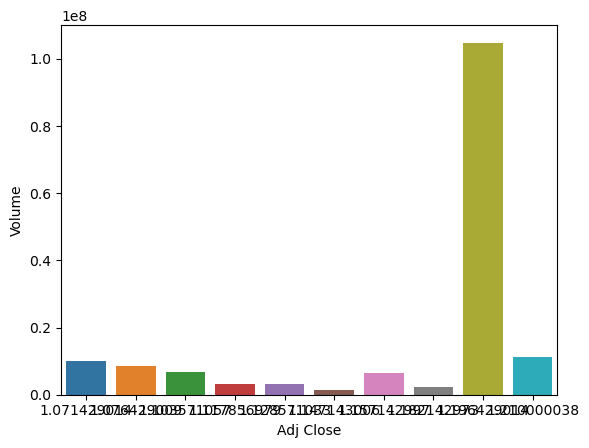

In [8]:
sns.barplot(x="Adj Close",y="Volume", data=data)

In [9]:
x=df.drop(columns=["Date"],axis=1).head(10)
x

,High,Low,Open,Close,Volume,Adj Close
0,1.242857,1.145714,1.156429,1.196429,104790000,1.196429
1,1.225000,1.197143,1.214286,1.210000,11104800,1.210000
2,1.232143,1.157143,1.213571,1.157143,6609400,1.157143
3,1.164286,1.085714,1.164286,1.103571,6757800,1.103571
4,1.107857,1.071429,1.107857,1.071429,10154200,1.071429
5,1.078571,1.071429,1.078571,1.076429,8464400,1.076429
6,1.149286,1.076429,1.080000,1.128571,3151400,1.128571
7,1.140000,1.110714,1.135714,1.117857,3105200,1.117857
8,1.159286,1.107143,1.110714,1.147143,1531600,1.147143
9,1.232143,1.148571,1.150000,1.182143,2305800,1.182143


<Axes: >

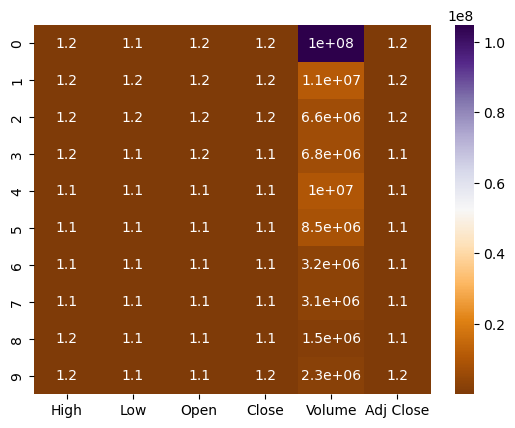

In [10]:
sns.heatmap(x,cmap='PuOr',annot=True)

In [11]:
closed_prices=df["Close"]
seq_len=15
mm=MinMaxScaler()
scaled_price=mm.fit_transform(np.array(closed_prices)[... , None]).squeeze()

In [12]:
X=[]
y=[]

In [13]:
for i in range(len(scaled_price)-seq_len):
    X.append(scaled_price[i:i+seq_len])
    y.append(scaled_price[i+seq_len])

In [14]:
X=np.array(X)[...,None]
y=np.array(y)[...,None]

In [15]:
train_x=torch.from_numpy(X[:int(0.8*X.shape[0])]).float()
train_y=torch.from_numpy(y[:int(0.8*X.shape[0])]).float()
test_x=torch.from_numpy(X[int(0.8*X.shape[0]):]).float()
test_y=torch.from_numpy(y[int(0.8*X.shape[0]):]).float()

In [16]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.lstm=nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc=nn.Linear(hidden_size,1)
    def forward(self,x):
        output ,(hidden,cell)=self.lstm(x)
        return self.fc(hidden[-1,:])

In [17]:
model=Model(1,64)

In [18]:
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [19]:
loss_fn=nn.MSELoss()

In [20]:
num_epochs=100

In [21]:
for epoch in range(num_epochs):
    output=model(train_x)
    loss=loss_fn(output, train_y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 10== 0 and epoch !=0:
        print(epoch,"epoch loss",loss.detach().numpy())

10 epoch loss 0.007102108
20 epoch loss 0.0062936307
30 epoch loss 0.0045046206
40 epoch loss 0.0043674214
50 epoch loss 0.0038250936
60 epoch loss 0.003291045
70 epoch loss 0.0023848596
80 epoch loss 0.0005630498
90 epoch loss 0.0002808434


In [22]:
model.eval()
with torch.no_grad():
    output=model(test_x)

In [23]:
pred=mm.inverse_transform(output.numpy())
real=mm.inverse_transform(test_y.numpy())

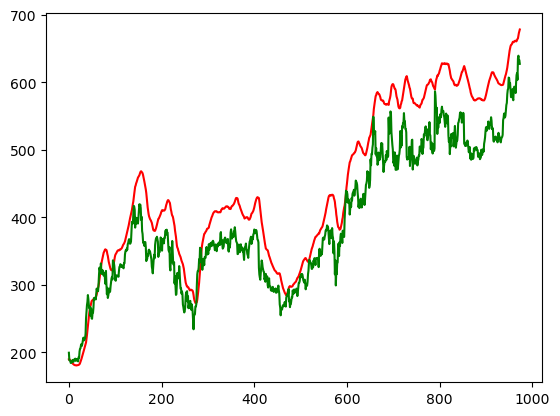

In [24]:
plt.plot(pred.squeeze(),color="red",label="predicted")
plt.plot(real.squeeze(),color="green",label="real")
plt.show()